# Trained DQN test

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import *
import numpy as np

## graph

In [2]:
result_data = 'log_0116.csv'
avg_delay = 'avg_delay_0116.csv'
epsilon_max = 1 

In [3]:
#the result data frame has [episode_num, duration, final step, score, epsilon, a minimum of average loss]
df = pd.read_csv(result_data).drop('Unnamed: 0',axis=1)
epsilon_ = df['Epsilon'] < epsilon_max
df = df[epsilon_].reset_index(drop=True,inplace=False)
df

,Episode,Duration,Slots,Score,Epsilon,min_loss,c&c,audio,video,be
0,0,1.9278,810,-68.2,0.999990,99999.000000,105,24,6,500
1,1,1.1790,234,-11.2,0.999980,99999.000000,95,26,7,593
2,2,1.2240,108,0.4,0.999970,99999.000000,91,31,8,600
3,3,0.7236,219,-3.4,0.999960,99999.000000,82,23,6,400
4,4,1.3590,138,1.5,0.999950,99999.000000,164,43,11,500
...,...,...,...,...,...,...,...,...,...,...
99995,99995,1.5012,390,-20.0,0.367892,0.727491,103,32,8,600
99996,99996,1.0782,342,-15.4,0.367889,0.676707,48,19,5,600
99997,99997,1.5750,225,4.1,0.367885,0.697395,107,43,11,600
99998,99998,1.3950,384,7.2,0.367881,0.858636,196,48,11,600


In [4]:
df_ = pd.read_csv(avg_delay)
df_

,Unnamed: 0,Episode,c&c,audio,video,be
0,0,0,0.162788,0.188582,0.166073,0.036754
1,1,1,0.027808,0.024133,0.035565,0.102630
2,2,2,0.013385,0.006754,0.019230,0.030172
3,3,3,0.029419,0.024609,0.039060,0.022356
4,4,4,0.008987,0.005192,0.010663,0.100385
...,...,...,...,...,...,...
99995,99995,99995,0.046531,0.042635,0.064693,0.059366
99996,99996,99996,0.042147,0.040004,0.050004,0.040639
99997,99997,99997,0.008920,0.005579,0.011368,0.045603
99998,99998,99998,0.005766,0.004292,0.007127,0.018420


In [5]:
x=range(int(len(df['Episode'])))
y=df['Epsilon']
y2=df['Score']
y3=df['min_loss']
y4=df['c&c']
y5=df['audio']
y6=df['video']
y7=df_['c&c']
y8=df_['audio']
y9=df_['video']

Text(0, 0.5, 'Epsilon')

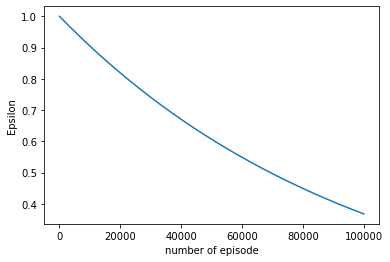

In [6]:
plt.plot(x,y)
plt.xlabel('number of episode')
plt.ylabel('Epsilon')

Text(0, 0.5, 'sum of reward')

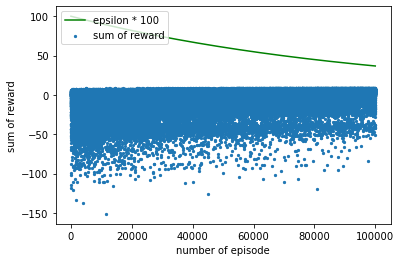

In [7]:
plt.scatter(x,y2, s=5, label='sum of reward')
plt.plot(x,y*100, c='g', label = 'epsilon * 100')
plt.legend(loc='upper left')
plt.xlabel('number of episode')
plt.ylabel('sum of reward')

(-100.0, 10.0)

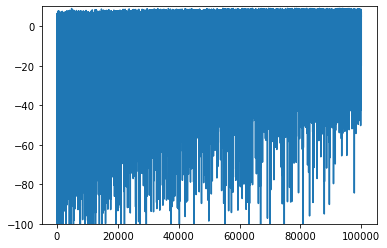

In [19]:
plt.plot(x,y2, label='sum of reward')
plt.ylim((-100,10))

(3.0, 10.0)

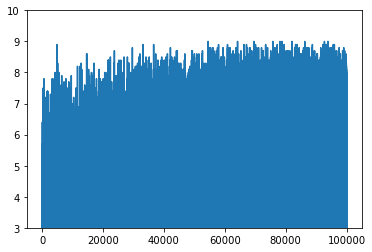

In [22]:
plt.plot(x,y2, label='sum of reward')
plt.ylim((3,10))

Text(0, 0.5, 'loss')

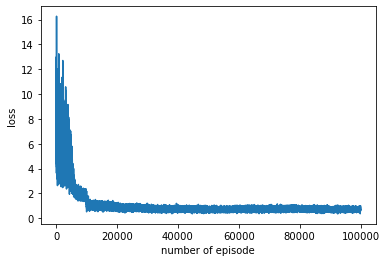

In [17]:
#plt.ylim((0,1))
plt.plot(x[30:],y3[30:])
#plt.plot(x,y)
plt.xlabel('number of episode')
plt.ylabel('loss')

In [99]:
z=(y5+y6)/10

In [172]:
y2

0        16.8
1        14.1
2        23.8
3        27.4
4        14.2
        ...  
1995    101.0
1996     87.9
1997     96.0
1998    100.0
1999     94.0
Name: Score, Length: 2000, dtype: float64

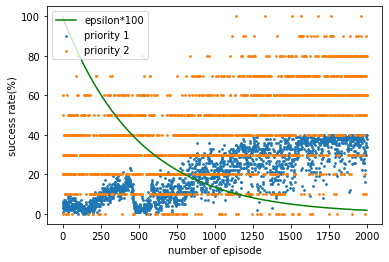

In [173]:
#plt.ylim((0,1))
#ax=plt.subplot2grid((1,1),(0,0))
plt.scatter(x,y4/40*100,  s=3,  label='priority 1')
plt.scatter(x,z*100, s=3, label='priority 2')
plt.plot(x,y*100, c='g', label = 'epsilon*100')

#plt.scatter(x,y6/2, s=3)
#plt.plot(x,y)
#ax.grid(True)
#ax.annotate('dd',xy=(0.8,0.2),textcoords='axes fraction')
plt.xlabel('number of episode')
#cb=plt.colorbar(label = 'priority')
#cb.set_ticks([0,1])
plt.ylabel('success rate(%)')
plt.legend(loc='upper left')

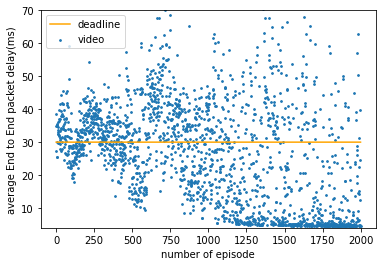

In [166]:
#plt.ylim((0,1))
#ax=plt.subplot2grid((1,1),(0,0))
plt.ylim((4,70))

plt.scatter(x,y9*1000,  s=3,  label='video')
plt.plot(x,[30 for _ in range(len(x))], c ='orange', label = 'deadline')
#plt.scatter(x,y8, s=3, label='priority 2')
#plt.plot(x,y, c='g', label = 'epsilon')

#plt.scatter(x,y6/2, s=3)
#plt.plot(x,y)
#ax.grid(True)
#ax.annotate('dd',xy=(0.8,0.2),textcoords='axes fraction')
plt.xlabel('number of episode')
#cb=plt.colorbar(label = 'priority')
#cb.set_ticks([0,1])
plt.ylabel('average End to End packet delay(ms)')
plt.legend(loc='upper left')

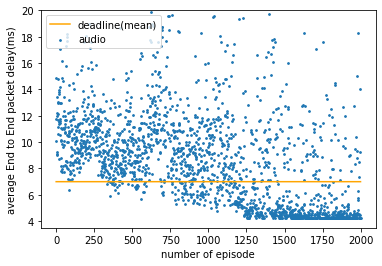

In [170]:
#plt.ylim((0,1))
#ax=plt.subplot2grid((1,1),(0,0))
plt.ylim((3.5,20))

plt.scatter(x,y8*1000,  s=3,  label='audio')
plt.plot(x,[7 for _ in range(len(x))], c ='orange', label = 'deadline(mean)')

#plt.scatter(x,y8, s=3, label='priority 2')
#plt.plot(x,y, c='g', label = 'epsilon')

#plt.scatter(x,y6/2, s=3)
#plt.plot(x,y)
#ax.grid(True)
#ax.annotate('dd',xy=(0.8,0.2),textcoords='axes fraction')
plt.xlabel('number of episode')
#cb=plt.colorbar(label = 'priority')
#cb.set_ticks([0,1])
plt.ylabel('average End to End packet delay(ms)')
plt.legend(loc='upper left')

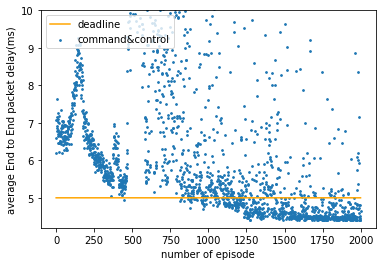

In [156]:
#plt.ylim((0,1))
#ax=plt.subplot2grid((1,1),(0,0))
plt.ylim((4.2,10))

plt.scatter(x,y7*1000,  s=3,  label='command&control')
plt.plot(x,[5 for _ in range(len(x))], c ='orange', label = 'deadline')
#plt.scatter(x,y8, s=3, label='priority 2')
#plt.plot(x,y, c='g', label = 'epsilon')

#plt.scatter(x,y6/2, s=3)
#plt.plot(x,y)
#ax.grid(True)
#ax.annotate('dd',xy=(0.8,0.2),textcoords='axes fraction')
plt.xlabel('number of episode')
#cb=plt.colorbar(label = 'priority')
#cb.set_ticks([0,1])
plt.ylabel('average End to End packet delay(ms)')
plt.legend(loc='upper left')

In [10]:
t = df['Slots']
s = df["success rate"]

KeyError: 'success rate'

In [16]:
s

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1553   NaN
1554   NaN
1555   NaN
1556   NaN
1557   NaN
Name: success rate, Length: 1558, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (1558,) and (1,)

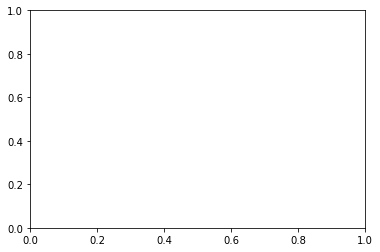

In [13]:
plt.subplot(111)
plt.plot(x,s[0])
plt.show()

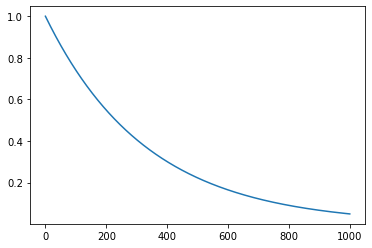

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,1000)
y = 1*(0.997**x)
plt.plot(x,y)
plt.show()

## model test

In [31]:
md=keras.models.load_model("[1999]0.011379198171198368.h5")
md.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
Total params: 8,768
Trainable params: 8,768
Non-trainable params: 0
______________________________________________________

In [10]:
action_list=np.array(['1111111111','1111100000','1001001001'
                        ,'1010101010','0000011111','1100110011','0011001100'
                        ,'0000000001','0000100001','0000000000'])

In [11]:
#higher prioirty for lower agent
cc = keras.models.load_model("agent[1]1.2128006346756592e-05.h5")
ad = keras.models.load_model("agent[2]1.2128006346756592e-05.h5")
vd = keras.models.load_model("agent[3]1.2128006346756592e-05.h5")
be = keras.models.load_model("agent[4]1.2128006346756592e-05.h5")
# cc.summary()

In [17]:
#state=np.array([0,0,0,100]).reshape(-1,4)
state1 = np.array([1,1]).reshape(1,2)
state2 = np.array([0.3,0.3]).reshape(1,2)
state3 = np.array([0.9,0.9]).reshape(1,2)
state4 = np.array([0.9,0.9]).reshape(1,2)

In [18]:
import warnings
warnings.filterwarnings(action='ignore') 

cc_act = action_list[np.argmax(cc.predict(state1))]
ad_act = action_list[np.argmax(ad.predict(state2))]
vd_act = action_list[np.argmax(ad.predict(state3))]
be_act = action_list[np.argmax(ad.predict(state4))]
# a = format(np.argmax(cc.predict(state1)),'0'+str(10)+'b')
# b = format(np.argmax(ad.predict(state2)),'0'+str(10)+'b')
# c = format(np.argmax(vd.predict(state3)),'0'+str(10)+'b')
# d = format(np.argmax(be.predict(state4)),'0'+str(10)+'b')
print(cc_act)
print(ad_act)
print(vd_act)
print(be_act)

0011001100
0000000000
0000000000
0000000000


In [45]:
gcl = [cc_act,ad_act,vd_act,be_act]
a = np.array([list(map(int,g)) for g in gcl])

In [46]:
a[:,2]

array([1, 0, 0, 0])

-----------

In [34]:
sim = pd.read_csv('switchlog0818_generated.csv')
sim = sim.drop('Unnamed: 0',axis=1)
generated_time=list(sim['time'])
generated_time=list(map(float,generated_time))
A=sim.loc[:,['Unnamed: 6']].values.tolist()
A_=list(map(str,A))
A_[3]
B = [float(a[14:33]) for a in A_]
c=[B[i]-generated_time[i] for i in range(len(B))]
sim.loc[:,'delay']=c

In [45]:
sim

,switch,class,number,time,queue,Unnamed: 6,delay
0,1,1,1,1.629348e+09,x,Epoch Time: 1629347652.297989364 seconds,0.009559
1,2,1,1,1.629348e+09,x,Epoch Time: 1629347652.299038561 seconds,0.006399
2,1,2,1,1.629348e+09,x,Epoch Time: 1629347652.298282571 seconds,0.004663
3,2,2,1,1.629348e+09,x,Epoch Time: 1629347652.299276543 seconds,0.004616
4,1,3,1,1.629348e+09,x,Epoch Time: 1629347652.298574273 seconds,0.002954
5,2,3,1,1.629348e+09,x,Epoch Time: 1629347652.299504492 seconds,0.002894
6,1,2,2,1.629348e+09,x,Epoch Time: 1629347652.304101529 seconds,0.004231
7,2,2,2,1.629348e+09,x,Epoch Time: 1629347652.304573058 seconds,0.003683
8,1,1,2,1.629348e+09,x,Epoch Time: 1629347652.304323633 seconds,0.002414
9,2,1,2,1.629348e+09,x,Epoch Time: 1629347652.304807973 seconds,0.001908


In [46]:
one = sim['class']==1
one = sim[one]
two = sim['class'] ==2
two = sim[two]
th = sim['class'] ==3
th = sim[th]

In [47]:
one

,switch,class,number,time,queue,Unnamed: 6,delay
0,1,1,1,1.629348e+09,x,Epoch Time: 1629347652.297989364 seconds,0.009559
1,2,1,1,1.629348e+09,x,Epoch Time: 1629347652.299038561 seconds,0.006399
8,1,1,2,1.629348e+09,x,Epoch Time: 1629347652.304323633 seconds,0.002414
9,2,1,2,1.629348e+09,x,Epoch Time: 1629347652.304807973 seconds,0.001908
13,1,1,3,1.629348e+09,x,Epoch Time: 1629347652.310329527 seconds,0.001299
15,2,1,3,1.629348e+09,x,Epoch Time: 1629347652.316375861 seconds,0.004566
19,1,1,4,1.629348e+09,x,Epoch Time: 1629347652.322059223 seconds,0.002549
20,2,1,4,1.629348e+09,x,Epoch Time: 1629347652.329832587 seconds,0.009002
24,1,1,5,1.629348e+09,x,Epoch Time: 1629347652.338006233 seconds,0.005846
25,2,1,5,1.629348e+09,x,Epoch Time: 1629347652.338251645 seconds,0.005062


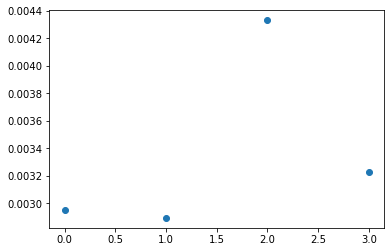

In [66]:
import matplotlib.pyplot as plt

import pandas as pd
from pandas import DataFrame
from pandas import Series

#plt.subplot(311)
# plt.ylim(-0.1,0.1)
#plt.scatter(range(len(one['delay'])),list(one['delay']))
#plt.subplot(312)
# plt.ylim(-0.1,0.1)
#plt.scatter(range(len(two['delay'])),list(two['delay']))
#plt.subplot(313)
# plt.ylim(-0.1,0.1)
plt.scatter(range(len(th['delay'])),list(th['delay']))
#plt.show()

In [59]:
list(th['delay'])

[0.002954244613647461,
 0.0028944015502929688,
 0.004332542419433594,
 0.003226041793823242]

ValueError: s must be a scalar, or the same size as x and y

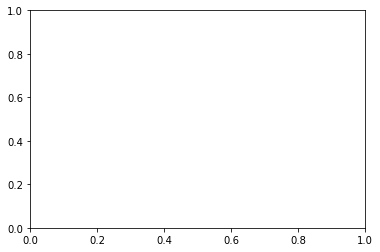

In [63]:

r1=range(len(one['delay']))
r2=range(len(two['delay']))
r3=range(len(th['delay']))
plt.scatter(r1,list(one['delay']),list(two['delay']),'r-')
#plt.scatter(r1,list(one['delay']),r2,list(two['delay']),r3,list(th['delay']))


In [160]:
#len(one['delay'])
a=range(40)
#list(one['delay'])
a[3]

3

In [180]:
import numpy as np
print(np.mean(one['delay']))
print(np.mean(two['delay']))
#print(np.mean(th['delay']))      

0.0036236226558685304
0.004235580563545227


In [181]:
np.mean(th['delay'])

0.0033518075942993164

In [184]:
np.mean(sim['delay'])

0.0037686904271443684

----------

# Class간 객체 공유

In [26]:
from a import A
from b import B

a = A()
b = B()

In [27]:
a.pr(22)
a.pr(1)
a.pr(3)

[Flow(type_=22, num_=1, deadline_=None, generated_time_=None, node_arrival_time_=None, node_departure_time_=None, arrival_time_=None, bits_=None, met_=None)]
[Flow(type_=22, num_=1, deadline_=None, generated_time_=None, node_arrival_time_=None, node_departure_time_=None, arrival_time_=None, bits_=None, met_=None), Flow(type_=1, num_=1, deadline_=None, generated_time_=None, node_arrival_time_=None, node_departure_time_=None, arrival_time_=None, bits_=None, met_=None)]
[Flow(type_=22, num_=1, deadline_=None, generated_time_=None, node_arrival_time_=None, node_departure_time_=None, arrival_time_=None, bits_=None, met_=None), Flow(type_=1, num_=1, deadline_=None, generated_time_=None, node_arrival_time_=None, node_departure_time_=None, arrival_time_=None, bits_=None, met_=None), Flow(type_=3, num_=1, deadline_=None, generated_time_=None, node_arrival_time_=None, node_departure_time_=None, arrival_time_=None, bits_=None, met_=None)]


In [28]:
a.ex = sorted(a.ex, key=lambda flow: flow.type_) #class별 정렬까지

In [29]:
a.ex

[Flow(type_=1, num_=1, deadline_=None, generated_time_=None, node_arrival_time_=None, node_departure_time_=None, arrival_time_=None, bits_=None, met_=None),
 Flow(type_=3, num_=1, deadline_=None, generated_time_=None, node_arrival_time_=None, node_departure_time_=None, arrival_time_=None, bits_=None, met_=None),
 Flow(type_=22, num_=1, deadline_=None, generated_time_=None, node_arrival_time_=None, node_departure_time_=None, arrival_time_=None, bits_=None, met_=None)]

A(env)에서 B(node)를 호출해 정보를 쓰고, 다시 출력했더니 쓴 정보(type, num = 1)이 그대로 나오는것을 확인 

# 병렬 프로세스 처리

In [3]:
import simpy 
import numpy as np 

## 물론 이 아래 부분을 클래스로 구현을 해도 좋지만 일단은 이해를 위해서 다 함수로 표현함 
# def subsubprocess(env):
#     ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
#     print('        subsubprocess start at {:6.2f}'.format(env.now))
#     for i in range(0, 2):
#         execution_time = np.random.triangular(left=1, right=2, mode=1)
#         yield env.timeout(execution_time)
#     print('        subsubprocess over  at {:6.2f}'.format(env.now))
def subprocess1(env,store): #flow generate process
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for _ in range(10):
        print('    subprocess1 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.put(1)
        #print ('put item',store.items)
        yield env.timeout(1/1000)
        print('    subprocess1 over  at {:6.5f}'.format(env.now))
    
def subprocess2(env,store):
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for _ in range(10):
        print('    subprocess2 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.get()
        print ('get item',store.items)
        yield env.timeout(5/1000)
        print('    subprocess2 over  at {:6.5f}'.format(env.now))
        
def subprocess3(store): #packet out process
    for _ in range(4):
        yield store.put(2)
    
    
def process(env,store, activity_lst):
    while True:
        for act in activity_lst:
            print("start {} at {:6.5f}".format(act, env.now))
            execution_time = np.random.triangular(left=3, right=10, mode=6)
            ## 모든 activity는 subprocess라고 생각한다.
            ## subprocess(env)가 종료되어야 다음 스텝으로 넘어감
            ## 즉 일종의 waiting for other process를 구현했다고 보면 됨 
            
            env.process(subprocess1(env,store))
            env.process(subprocess2(env,store))
            
            for _ in range(10):
                env.process(subprocess3(store))
                yield env.timeout(3/1000)
            print("end   {} at {:6.5f}".format(act, env.now))
            #transfer_time = np.random.triangular(left=1, right=3, mode=2)
            
            print('process instance ends')
            print('#'*30)
            print(env.now)
        return 
###########
env = simpy.Environment()
store = simpy.Store(env, capacity = 100)
process1 = process(env,store, ["act_{}".format(i) for i in range(0, 3)])
env.process(process1)
env.run(1)

start act_0 at 0.00000
    subprocess1 start at 0.00000
    subprocess2 start at 0.00000
get item [2]
    subprocess1 over  at 0.00100
    subprocess1 start at 0.00100
    subprocess1 over  at 0.00200
    subprocess1 start at 0.00200
    subprocess1 over  at 0.00300
    subprocess1 start at 0.00300
    subprocess1 over  at 0.00400
    subprocess1 start at 0.00400
    subprocess2 over  at 0.00500
    subprocess2 start at 0.00500
    subprocess1 over  at 0.00500
    subprocess1 start at 0.00500
get item [2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1]
    subprocess1 over  at 0.00600
    subprocess1 start at 0.00600
    subprocess1 over  at 0.00700
    subprocess1 start at 0.00700
    subprocess1 over  at 0.00800
    subprocess1 start at 0.00800
    subprocess1 over  at 0.00900
    subprocess1 start at 0.00900
    subprocess2 over  at 0.01000
    subprocess2 start at 0.01000
get item [2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2]
    subprocess1 over  at 0.01000
    subprocess

In [ ]:
import simpy 
import numpy as np 

## 물론 이 아래 부분을 클래스로 구현을 해도 좋지만 일단은 이해를 위해서 다 함수로 표현함 
# def subsubprocess(env):
#     ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
#     print('        subsubprocess start at {:6.2f}'.format(env.now))
#     for i in range(0, 2):
#         execution_time = np.random.triangular(left=1, right=2, mode=1)
#         yield env.timeout(execution_time)
#     print('        subsubprocess over  at {:6.2f}'.format(env.now))
def subprocess1(env,store):
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for i in range(0, 10):
        yield env.timeout(5/1000)
        print('    subprocess1 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.put(1)
        print ('put item',store.items)
        print('    subprocess1 over  at {:6.5f}'.format(env.now))
    
def subprocess2(env,store):
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for i in range(0, 10):
        yield env.timeout(5/1000)
        print('    subprocess2 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.get()
        print ('get item',store.items)
        print('    subprocess2 over  at {:6.5f}'.format(env.now))
    
def process(env, store, activity_lst):
    while True:
        for act in activity_lst:
            print("start {} at {:6.5f}".format(act, env.now))
            execution_time = np.random.triangular(left=3, right=10, mode=6)
            ## 모든 activity는 subprocess라고 생각한다.
            ## subprocess(env)가 종료되어야 다음 스텝으로 넘어감
            ## 즉 일종의 waiting for other process를 구현했다고 보면 됨 
            yield env.process(subprocess1(env,store))
            yield env.process(subprocess2(env,store))
            ##############
            print("end   {} at {:6.5f}".format(act, env.now))
            transfer_time = np.random.triangular(left=1, right=3, mode=2)
            #yield env.timeout(transfer_time)
        print('process instance ends')
        print('#'*30)
        return None
###########
env = simpy.Environment()
store = simpy.Store(env, capacity=100)
process1 = process(env, store, ["act_{}".format(i) for i in range(0, 3)])
env.process(process1)
env.run(50)

In [10]:
npzload = np.load('1019_1_npz.npz', allow_pickle=True)

In [13]:
delay=npzload['delay']

In [18]:
sa = npzload['stateaction']

In [23]:
sa[:500]

array([[{1: array([[0., 0., 3.],
               [0., 0., 3.],
               [0., 0., 3.],
               [0., 0., 3.]]), 2: array([[0., 0., 3.],
               [0., 0., 3.],
               [0., 0., 3.],
               [0., 0., 3.]]), 3: array([[0., 0., 2.],
               [0., 0., 2.],
               [0., 0., 2.],
               [0., 0., 2.]]), 4: array([[0., 0., 1.],
               [0., 0., 1.],
               [0., 0., 1.],
               [0., 0., 1.]]), 5: array([[0., 0., 0.],
               [0., 0., 0.],
               [0., 0., 0.],
               [0., 0., 0.]]), 6: array([[0., 0., 0.],
               [0., 0., 0.],
               [0., 0., 0.],
               [0., 0., 0.]])}                        ,
        list([['0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '1', '1', '1', '1', '1'], ['1', '1', '0', '0', '1', '1', '0', '0', '1', '1'], ['0', '0', '0', '0', '1', '0', '0', '0', '0', '1']])],
       [{1: array([[0., 0., 3.],
               [0., 0., 3.],
 